# Splitting Data

In [1]:
import pandas as pd
import math as ma
from pathlib import Path

In [2]:
path_1 = Path(r'C:\Users\Desktop\money\coding\2. Crypto\Backtesting\Remaking Data')
df = pd.read_csv(path_1.joinpath("BTC_12H_OHLC_UTC.csv"))
df

,Timestamp,Open,High,Low,Close,Volume
0,2015-01-01 00:00:00,321.00,321.00,312.60,315.57,2538.010035
1,2015-01-01 12:00:00,315.57,317.37,313.24,313.81,2516.000581
2,2015-01-02 00:00:00,313.81,315.99,311.96,314.30,1892.409396
3,2015-01-02 12:00:00,314.93,317.01,313.45,315.42,2880.737510
4,2015-01-03 00:00:00,315.42,316.58,303.46,304.90,7332.946209
...,...,...,...,...,...,...
5798,2022-12-14 00:00:00,17775.82,17878.50,17734.19,17824.93,77465.140230
5799,2022-12-14 12:00:00,17824.93,18387.95,17660.94,17803.15,189216.081860
5800,2022-12-15 00:00:00,17804.01,17854.82,17561.00,17720.33,78631.824040
5801,2022-12-15 12:00:00,17720.33,17725.93,17275.51,17356.34,145070.144780


In [3]:
data_start = df.Timestamp.iloc[0]
data_start

'2015-01-01 00:00:00'

In [4]:
data_end = df.Timestamp.iloc[-1]
data_end

'2022-12-16 00:00:00'

# Optimizing

In [5]:
from IterativeOPT_MASR_V1 import *

In [6]:
## Here I am defining the parameters that I need to pass
symbol = "Close"
SMA = 10
EMA = 280
PCT_BUY = 0.06
PCT_SELL = 0.17
Keep_Signal_1 = 1
Keep_Signal_2 = 1
Keep_Signal_3 = 1
Keep_Signal_4 = 1
stop_loss = 0.20
start = data_start
end = data_end
amount = 3000
leverage = 1
fee = 0.001

In [7]:
optimizer = IterativeBacktest(symbol, start, end, amount, SMA, EMA, PCT_BUY, PCT_SELL, stop_loss, Keep_Signal_1, Keep_Signal_2, Keep_Signal_3, Keep_Signal_4, leverage, fee)

In [8]:
optimizer.data

,Open,High,Low,Close,Volume,returns,SMA_Trend,EMA_Trend
Timestamp,,,,,,,,
2015-01-01 00:00:00,321.00,321.00,312.60,315.57,2538.010035,NaN,NaN,NaN
2015-01-01 12:00:00,315.57,317.37,313.24,313.81,2516.000581,-0.005593,NaN,NaN
2015-01-02 00:00:00,313.81,315.99,311.96,314.30,1892.409396,0.001560,NaN,NaN
2015-01-02 12:00:00,314.93,317.01,313.45,315.42,2880.737510,0.003557,NaN,NaN
2015-01-03 00:00:00,315.42,316.58,303.46,304.90,7332.946209,-0.033921,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-12-14 00:00:00,17775.82,17878.50,17734.19,17824.93,77465.140230,0.002822,17291.985,20231.161229
2022-12-14 12:00:00,17824.93,18387.95,17660.94,17803.15,189216.081860,-0.001223,17359.444,20213.880011
2022-12-15 00:00:00,17804.01,17854.82,17561.00,17720.33,78631.824040,-0.004663,17414.616,20196.132324


In [9]:
optimizer.test_strategy()

---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 10 EMA_Trend = 280 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
2015-06-17 00:00:00 |  Buying 11.979853699484352 for 250.17
2015-06-20 00:00:00 |  Selling 11.979853699484352 for 243.75, PCT = -0.02766, Trigger SMA Close
2015-06-22 12:00:00 |  Buying 11.854745477200307 for 245.83
2015-06-23 12:00:00 |  Selling 11.854745477200307 for 243.0, PCT = -0.01351, Trigger SMA Close
2015-06-27 12:00:00 |  Buying 11.722028155267497 for 245.26
2015-07-03 00:00:00 |  Selling 11.722028155267497 for 254.54, PCT = 0.03584, Trigger SMA Close
2015-07-05 00:00:00 |  Buying 11.437967966019635 for 260.34
2015-07-14 12:00:00 |  Selling 11.437967966019635 for 288.56, PCT = 0.1064, Trigger SMA Close
2015-07-21 00:00:00 |  Buying 11.808360841520392 for 278.95
2015-07-22 00:00:00 |  Selling 11.808360841520392 for 276.49, PCT = 

2018-07-24 00:00:00 |  Buying 29.196046065637447 for 7721.65
2018-07-27 00:00:00 |  Selling 29.196046065637447 for 7920.0, PCT = 0.02369, Trigger SMA Close
2018-07-28 00:00:00 |  Buying 28.182020878230723 for 8188.57
2018-07-31 12:00:00 |  Selling 28.182020878230723 for 7980.01, PCT = -0.02747, Trigger SMA Close
2019-04-02 12:00:00 |  Buying 47.52686586505763 for 4722.45
2019-04-03 12:00:00 |  Selling 47.52686586505763 for 5162.23773, PCT = 0.09113, Trigger SMA Profit Close
2019-04-05 00:00:00 |  Buying 49.984186537878934 for 4898.64
2019-04-11 12:00:00 |  Selling 49.984186537878934 for 5001.01, PCT = 0.0189, Trigger SMA Close
2019-04-15 00:00:00 |  Buying 48.61783489807203 for 5131.28
2019-04-16 00:00:00 |  Selling 48.61783489807203 for 5024.95, PCT = -0.02272, Trigger SMA Close
2019-04-16 12:00:00 |  Buying 48.2466235006529 for 5053.49
2019-04-21 12:00:00 |  Selling 48.2466235006529 for 5217.5, PCT = 0.03045, Trigger SMA Close
2019-04-22 00:00:00 |  Buying 47.78466133042417 for 5257.

2022-03-25 00:00:00 |  Buying 52.34174494690585 for 43991.46
2022-04-01 00:00:00 |  Selling 52.34174494690585 for 45510.35, PCT = 0.03253, Trigger SMA Close
2022-04-04 00:00:00 |  Buying 51.227420218932075 for 46407.36
2022-04-04 12:00:00 |  Selling 51.227420218932075 for 46160.08, PCT = -0.00733, Trigger SMA Close
2022-04-05 00:00:00 |  Buying 50.66357932032372 for 46580.5
2022-04-06 00:00:00 |  Selling 50.66357932032372 for 45497.54, PCT = -0.02525, Trigger SMA Close
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 2302763.16
2022-12-16 00:00:00 | net performance (%) = 76658.77
2022-12-16 00:00:00 | number of trades executed = 531


76658.77194809772

In [10]:
optimizer.get_avg_profit_trade()

0.030560231443534296

In [11]:
optimizer.current_balance

2302763.1584429317

In [12]:
optimizer.annual_returns()

1.4073131499434735

In [13]:
optimizer.get_drawdown()

(0.27942456349967393, '2021-10-13 12:00:00')

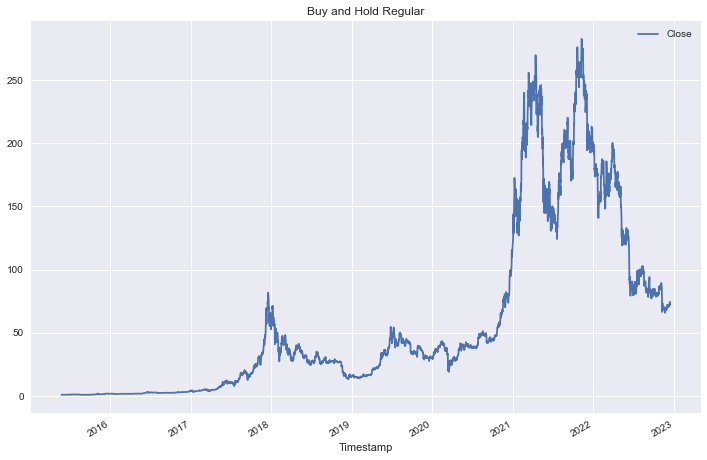

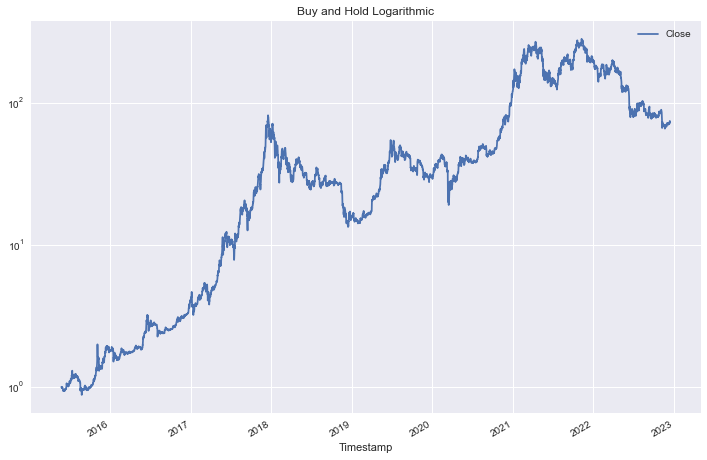

In [14]:
optimizer.plot_data()

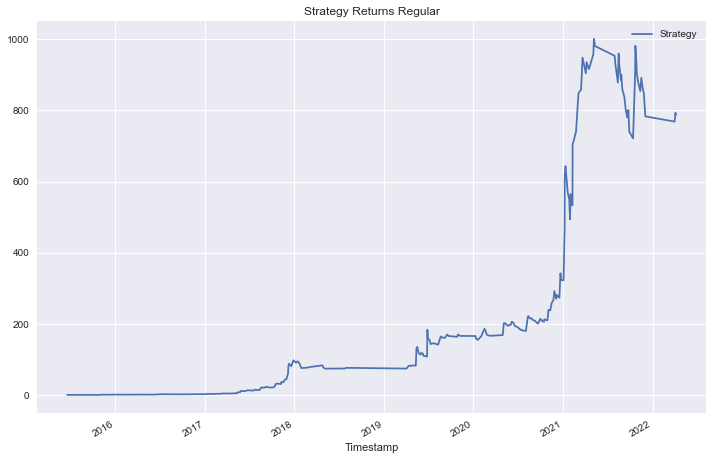

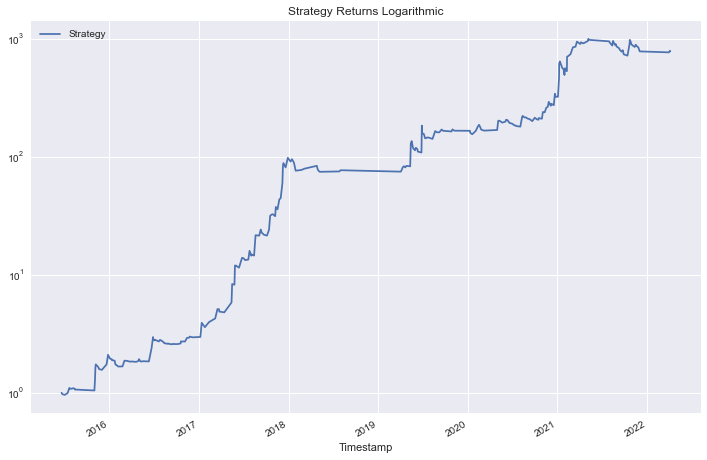

In [15]:
optimizer.plot_strategy()

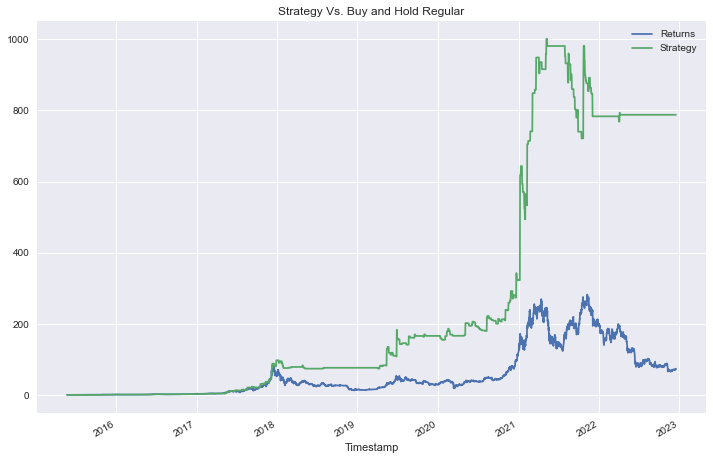

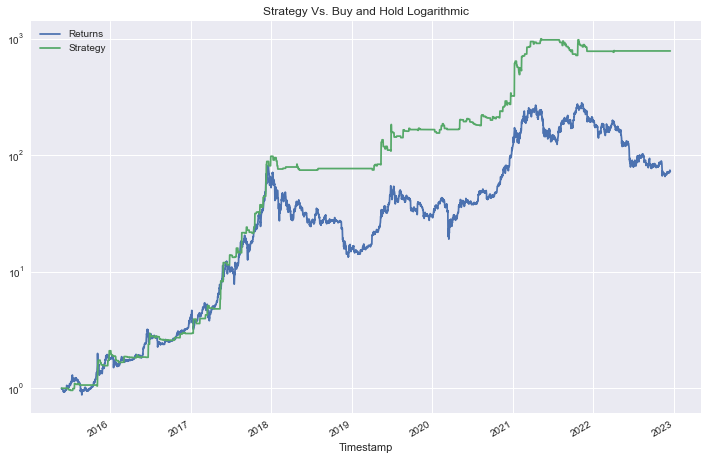

In [16]:
optimizer.plot_all()